#Data analysis of the Titanic dataset

In [96]:
#Start by importing libraries necessary for this project. 
import numpy as np
import pandas as pd

#Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Statistical packages
from scipy import stats

#Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


In [97]:
#Reading the data
df = pd.read_csv('train.csv')
#inspect the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [98]:
#The categorical variables are Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Cabin, Embarked. The numerical variables are PassengerId, Age, Fare. 
# Decription of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [99]:
#From the above description we can see that survival rate is 38%. 
#Data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
#From the above information we can see that there are missing values in Age, Cabin and Embarked columns. 
#Regarding the datatype there are 5 integer columns, 2 float columns and 5 object columns.

#Assesment of missing values
#calculate the percentage of missing values in each column
df.isnull().sum()/len(df)*100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [101]:
#We are not going to lose all that information. We will try to fill the missing values with a not applicable category. 
#we are going to impute the missing values with a 00 value.
df['Cabin'] = df['Cabin'].fillna('00')

# and now we are going to validate that the missing values were replaced with the 00 value.
df['Cabin'].isnull().sum()

0

In [102]:
#Now let's explore the Age column.
#First we are going to check the rows with missing values in the Age column.
df[df['Age'].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,00,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,00,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,00,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,00,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,00,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,00,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,00,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,00,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,00,C


In [103]:
#we are going to compare the Pclass distribution of the rows with missing values in the Age column with the Pclass distribution of the rows with values in the Age column.
df[df['Age'].isnull()]['Pclass'].value_counts()/len(df[df['Age'].isnull()])*100

Pclass
3    76.836158
1    16.949153
2     6.214689
Name: count, dtype: float64

In [104]:
#This means that 70% of the rows with missing values in the Age column are from the 3rd class.
#In comparison the distribution of the whole dataset is: 
df['Pclass'].value_counts()/len(df)*100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64

In [105]:
#In this case the best approach is to impute the missing values with the mean of the Age column by Pclass.
#First we are going to calculate the mean of the Age column by Pclass.
#let's save the results in a variable.
age_mean_by_pclass = df.groupby('Pclass')['Age'].mean().round(0)
#let's see the results
age_mean_by_pclass

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [106]:
#now let's impute the missing age values with the mean of the Age column by Pclass using the apply method.
df['Age'] = df.apply(lambda row: age_mean_by_pclass[row['Pclass']] if pd.isna(row['Age']) else row['Age'], axis=1)
#now let's make sure all values rounded to 2 decimals.
df['Age'] = df['Age'].round(2)

In [107]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,00,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,00,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,00,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,00,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,00,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,00,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,00,C


In [108]:
#By now we have imputed the missing values in the Age column based on the Pclass column. That allows us to keep the distribution of the Age column by Pclass while imputing the missing values.
#Now let's explore the Embarked column.
#First we are going to check the rows with missing values in the Embarked column.
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [109]:
#This means that the two rows with missing values in the Embarked column are from the 1st class and they have the same ticket number.
#The same ticket number means that they were travelling together. And  the fact that they were travelling together and they were from the 1st class means that they were probably from the same family.
#let's check the most common values in the Embarked column by Pclass.
df.groupby('Pclass')['Embarked'].value_counts()


Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64

In [110]:
#From the above results we can see that the most common value in the Embarked column for the 1st class is S.
#Now let's impute the missing values in the Embarked column with the most common value in the Embarked column for the 1st class.
df['Embarked'] = df['Embarked'].fillna('S')


In [111]:
#Now let's check the missing values in the dataset.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [112]:
# In conclusion we have imputed the missing values in the Age, cabin and Embarked columns. 
# The column with biggest number of missing values was the Cabin column. We have imputed the missing values in the Cabin column with a 00 value.
# The column with the second biggest number of missing values was the Age column. We have imputed the missing values in the Age column with the mean of the Age column by Pclass.
# Finally we have imputed the missing values in the Embarked column with the most common value in the Embarked column for the 1st class.

#Now let's explore duplicates in the dataset. The column that we are going to use to check for duplicates is the PassengerId column.
#First we are going to check the number of duplicates in the dataset.
df.duplicated(subset='PassengerId').sum()

0

In [114]:
#There were 0 duplicates in the dataset. 
#Now let's explore the distribution of the numerical variables.
#First we are going to check the distribution of the Age column to check wbich bins we are going to use. 
df['Age'].describe()

count    891.000000
mean      29.265062
std       13.212184
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

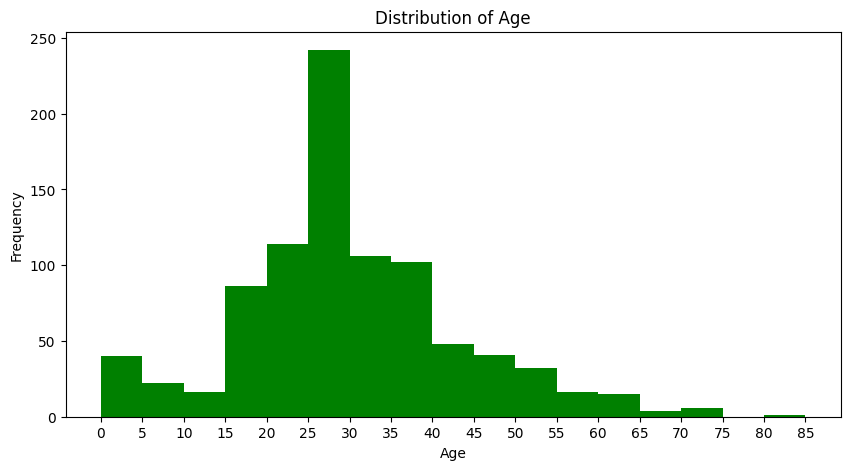

In [116]:
#From the above results we can see that the minimum age is 0.42 and the maximum age is 80.
#Now let's create an histogram to check the distribution of the Age column.
plt.figure(figsize=(10,5))
plt.hist(df['Age'], bins=(range(0,90,5)), color='green')
plt.xlabel('Age')
#let's edit the ticks 
plt.xticks(range(0,90,5))
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()
